In [288]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/03%20-%20Data%20Preprocessing/data_assignment.csv

In [289]:
data=pd.read_csv("https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/03%20-%20Data%20Preprocessing/data_assignment.csv",sep=',')

In [290]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [291]:
data.shape

(8523, 12)

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Checking For Duplicates

In [293]:
data.duplicated().sum()

0

# Checking for Null Values

In [294]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [295]:
data['Item_Weight'].mean()

12.857645184135976

In [296]:
data['Item_Weight'].median()

12.6

In [297]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [298]:
data['Item_Weight'].isna().sum()

0

In [299]:
data['Outlet_Location_Type'].shape

(8523,)

In [300]:
data['Outlet_Size'].mode()[0]

'Medium'

In [301]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [302]:
data['Outlet_Size'].isna().sum()

0

<Axes: >

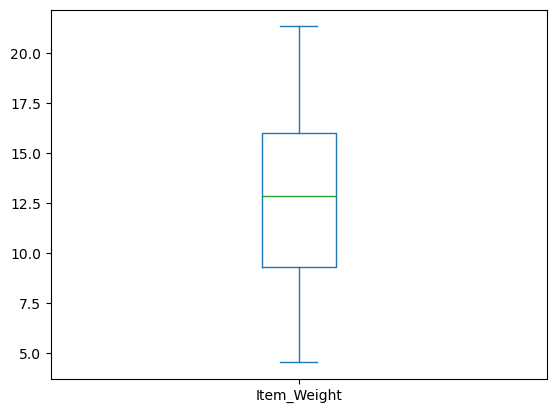

In [303]:
data['Item_Weight'].plot(kind='box')

In [304]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Checking for Zero and Neg Values

In [305]:
data=data[data['Item_Weight']>0]

In [306]:
data=data[data['Item_Visibility']>0]

In [307]:
data=data[data['Item_MRP']>0]

In [308]:
data=data[data['Item_Outlet_Sales']>0]

In [309]:
data.shape

(7997, 12)

# Checking for text error

Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type

In [310]:
data['Item_Identifier'].nunique()

1559

In [311]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCW05', 'NCT53', 'FDP15'],
      dtype=object)

In [312]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [313]:
data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

In [314]:
data['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
6       Regular
7       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 7997, dtype: object

In [315]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [316]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Snack Foods', 'Frozen Foods',
       'Fruits and Vegetables', 'Breakfast', 'Health and Hygiene',
       'Hard Drinks', 'Baking Goods', 'Household', 'Canned', 'Breads',
       'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [317]:
data['Item_Type'].nunique()

16

In [318]:
data['Outlet_Identifier'].nunique()

10

In [319]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT045', 'OUT017',
       'OUT046', 'OUT035', 'OUT019', 'OUT010'], dtype=object)

In [320]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [321]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [322]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

# Final values for Ordinal and Nominal data

# Ordinal Data

Item_Identifier      - 1559   1559
Item_Fat_Content     - 2      1
Item_Type            - 16     16
Outlet_Identifier    - 10     10
Outlet_Size          - 3      1
Outlet_Location_Type - 3      1
Outlet_Type          - 4      1
                              5
               Total columns = 1594

In [323]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [324]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [325]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [326]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

# Nominal Data

In [327]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Snack Foods', 'Frozen Foods',
       'Fruits and Vegetables', 'Breakfast', 'Health and Hygiene',
       'Hard Drinks', 'Baking Goods', 'Household', 'Canned', 'Breads',
       'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [328]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT045', 'OUT017',
       'OUT046', 'OUT035', 'OUT019', 'OUT010'], dtype=object)

In [329]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCW05', 'NCT53', 'FDP15'],
      dtype=object)

## Checking for Outliers

In [330]:
data_num=data.select_dtypes(include=np.number)

In [331]:
for col_name in data_num.columns[:]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])


Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 140, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)
Item_Outlet_Sales
Outliers =  43      6768.5228
130     7968.2944
132     6976.2524
145     7370.4060
203     6704.6060
          ...    
8245    7549.5062
8329    6630.0364
8350    7240.5750
8447    7588.1226
8510    7182.6504
Name: Item_Outlet_Sales, Length: 172, dtype: float64


In [332]:
data_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,1999,3735.1380
1,5.920000,0.019278,48.2692,2009,443.4228
2,17.500000,0.016760,141.6180,1999,2097.2700
6,13.650000,0.012741,57.6588,1987,343.5528
7,12.857645,0.127470,107.7622,1985,4022.7636
...,...,...,...,...,...
8518,6.865000,0.056783,214.5218,1987,2778.3834
8519,8.380000,0.046982,108.1570,2002,549.2850
8520,10.600000,0.035186,85.1224,2004,1193.1136
8521,7.210000,0.145221,103.1332,2009,1845.5976


In [333]:
scaling=StandardScaler()
data_Scale=pd.DataFrame(scaling.fit_transform(data_num),columns=data_num.columns)

In [356]:
data_Scale.reset_index().drop(columns='index')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.845424,-1.082103,1.746485,0.140339,0.913411
1,-1.645130,-1.017875,-1.493830,1.335922,-1.018210
2,1.094691,-1.067933,0.007011,0.140339,-0.047711
3,0.183783,-1.147827,-1.342866,-1.294360,-1.076815
4,-0.003688,1.132863,-0.537315,-1.533477,1.082193
...,...,...,...,...,...
7992,-1.421544,-0.272311,1.179142,-1.294360,0.351975
7993,-1.063096,-0.467144,-0.530967,0.499014,-0.956088
7994,-0.537845,-0.701640,-0.901313,0.738131,-0.578281
7995,-1.339917,1.485731,-0.611739,1.335922,-0.195396


In [357]:
data['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [358]:
data['Item_Fat_Content']

0       0
1       1
2       0
6       1
7       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 7997, dtype: int64

In [359]:
data['Outlet_Size'].replace({'Medium':1,'High':2,'Small':0},inplace=True)

In [361]:
data['Outlet_Size']

0       1
1       1
2       1
6       2
7       1
       ..
8518    2
8519    1
8520    0
8521    1
8522    0
Name: Outlet_Size, Length: 7997, dtype: int64

In [362]:
data['Outlet_Location_Type'].replace({'Tier 1':0,'Tier 3':2,'Tier 2':1},inplace=True)

In [363]:
data['Outlet_Location_Type']

0       0
1       2
2       0
6       2
7       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 7997, dtype: int64

In [364]:
data['Outlet_Type'].replace({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':0,'Supermarket Type3':3},inplace=True)

In [365]:
data_ordinal=data[['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [366]:
data_ordinal.reset_index().drop(columns='index')

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,1,0,1
1,1,1,2,2
2,0,1,0,1
3,1,2,2,1
4,0,1,2,3
...,...,...,...,...
7992,0,2,2,1
7993,1,1,1,1
7994,0,0,1,1
7995,1,1,2,2


In [367]:
data_Nom_Itype=pd.get_dummies(data['Item_Type'])

In [368]:
data_Nom_OutIndentifier=pd.get_dummies(data['Outlet_Identifier'])

In [369]:
data_Nom_IIdentifier=pd.get_dummies(data['Item_Identifier'])

In [370]:
data_Nom=pd.concat([data_Nom_Itype,data_Nom_OutIndentifier,data_Nom_IIdentifier],axis=1)

In [372]:
data_Nom.reset_index().drop(columns='index')

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7993,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7994,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
pd.concat([data_Nom,data_ordinal],axis=1).reset_index().drop(columns='index')

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,1
7993,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
7994,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
7995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,2


In [374]:
pd.concat([data_Scale,data_Nom,data_ordinal],axis=1).reset_index().drop(columns='index')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,...,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.845424,-1.082103,1.746485,0.140339,0.913411,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-1.645130,-1.017875,-1.493830,1.335922,-1.018210,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2,1.094691,-1.067933,0.007011,0.140339,-0.047711,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.183783,-1.147827,-1.342866,-1.294360,-1.076815,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.003688,1.132863,-0.537315,-1.533477,1.082193,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8484,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
8485,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8486,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8487,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0


In [375]:
data_Scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.845424,-1.082103,1.746485,0.140339,0.913411
1,-1.645130,-1.017875,-1.493830,1.335922,-1.018210
2,1.094691,-1.067933,0.007011,0.140339,-0.047711
3,0.183783,-1.147827,-1.342866,-1.294360,-1.076815
4,-0.003688,1.132863,-0.537315,-1.533477,1.082193
...,...,...,...,...,...
7992,-1.421544,-0.272311,1.179142,-1.294360,0.351975
7993,-1.063096,-0.467144,-0.530967,0.499014,-0.956088
7994,-0.537845,-0.701640,-0.901313,0.738131,-0.578281
7995,-1.339917,1.485731,-0.611739,1.335922,-0.195396


In [376]:
data_Scale.index

RangeIndex(start=0, stop=7997, step=1)

In [377]:
data_Nom.index

Int64Index([   0,    1,    2,    6,    7,    8,    9,   11,   12,   13,
            ...
            8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522],
           dtype='int64', length=7997)

In [378]:
data_ordinal.index

Int64Index([   0,    1,    2,    6,    7,    8,    9,   11,   12,   13,
            ...
            8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522],
           dtype='int64', length=7997)